In [1]:
import tensorflow as tf
import datetime
%load_ext tensorboard


In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
print(f"train data shape: {x_train.shape}")
print(f"train label shape: {y_train.shape}")
print(f"test data shape: {x_test.shape}")
print(f"test label shape: {y_test.shape}")

train data shape: (50000, 32, 32, 3)
train label shape: (50000, 1)
test data shape: (10000, 32, 32, 3)
test label shape: (10000, 1)


In [5]:
import matplotlib.pyplot as plt

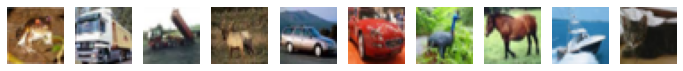

In [6]:
fig, ax= plt.subplots(1, 10, figsize=(12,6))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

In [7]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout

In [9]:
def get_model():
    model = Sequential([
                Conv2D(filters=64, kernel_size=(3,3), padding='SAME', input_shape=(32,32,3), activation='relu', name='conv_1'),
                BatchNormalization(),
                Conv2D(filters=32, kernel_size=(3,3), padding='SAME', activation='relu', name='conv_2'),
                BatchNormalization(),
                MaxPooling2D(pool_size=(8,8), name='pool_1'),
                Dropout(rate=0.5),
                Flatten(name='flatten_1'),
                Dense(16, activation='relu', name='dense_1'),
                Dense(10, activation='softmax', name='classification')
               
    ])
    
    opt = tf.optimizers.Adam(learning_rate=0.005)
    acc = tf.metrics.SparseCategoricalAccuracy()
    
    model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=[acc])
    
    return model

In [10]:
model = get_model()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 4, 4, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [13]:
early_stopping = EarlyStopping(patience=5, monitor='val_loss', mode='min')
learning_rate_reduction = ReduceLROnPlateau(patience=4, monitor='val_loss', factor=0.1)

checkpoint_best_path = 'D:/Python Data Science/Deep Learning for Computer Vision with TensorFlow 2/CV-TF1.X-2.X/3-ConvNets/checkpoint_best_path'

checkpoint_best = ModelCheckpoint(filepath=checkpoint_best_path, save_weights_only = True,
                                  save_freq = 'epoch', monitor='val_loss',
                                  save_best_only= True,
                                  verbose=1)

log_dir = 'D:/Python Data Science/Deep Learning for Computer Vision with TensorFlow 2/CV-TF1.X-2.X/3-ConvNets/checkpoint_best_path' +datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
callbacks= [early_stopping, learning_rate_reduction, checkpoint_best, tensorboard_callback]

In [15]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, callbacks=[callbacks])

Epoch 1/10
1563/1563 [==============================] - 173s 31ms/step - loss: 1.8160 - sparse_categorical_accuracy: 0.3077 - val_loss: 1.5320 - val_sparse_categorical_accuracy: 0.4190

Epoch 00001: val_loss improved from inf to 1.53204, saving model to D:/Python Data Science/Deep Learning for Computer Vision with TensorFlow 2/CV-TF1.X-2.X/3-ConvNets\checkpoint_best_path
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4583 - sparse_categorical_accuracy: 0.4617 - val_loss: 1.2981 - val_sparse_categorical_accuracy: 0.5235

Epoch 00002: val_loss improved from 1.53204 to 1.29807, saving model to D:/Python Data Science/Deep Learning for Computer Vision with TensorFlow 2/CV-TF1.X-2.X/3-ConvNets\checkpoint_best_path
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.3105 - sparse_categorical_accuracy: 0.5285 - val_loss: 1.1902 - val_sparse_categorical_accuracy: 0.5709

Epoch 00003: val_loss improved from 1.29807 to 1.19022, saving m

In [33]:
%cd "D:/Python Data Science/Deep Learning for Computer Vision with TensorFlow 2/CV-TF1.X-2.X/3-ConvNets/checkpoint_best_path"

%tensorboard --logdir logs

D:\Python Data Science\Deep Learning for Computer Vision with TensorFlow 2\CV-TF1.X-2.X\3-ConvNets\checkpoint_best_path


Reusing TensorBoard on port 6006 (pid 12508), started 0:08:16 ago. (Use '!kill 12508' to kill it.)

In [34]:
filepath = "D:/Python Data Science/Deep Learning for Computer Vision with TensorFlow 2/CV-TF1.X-2.X/3-ConvNets/checkpoint_best_path"

model.save(filepath=filepath)

INFO:tensorflow:Assets written to: D:/Python Data Science/Deep Learning for Computer Vision with TensorFlow 2/CV-TF1.X-2.X/3-ConvNets/checkpoint_best_path\assets


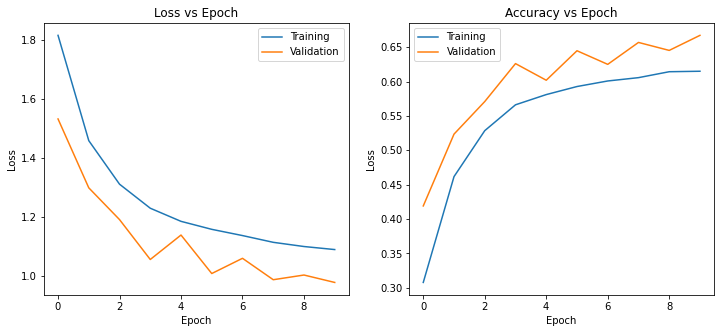

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))

fig.add_subplot(121)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')         
plt.ylabel('Loss')
plt.legend(['Training','Validation'], loc='best')         

fig.add_subplot(122)

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')         
plt.ylabel('Loss')
plt.legend(['Training','Validation'], loc='best') 

plt.show()

In [39]:
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)
    return test_loss, test_acc

In [40]:
test_loss, test_accuracy = get_test_accuracy(model, x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.9767529368400574
Test accuracy: 0.6672000288963318


In [41]:
model1 = get_model()
model1.load_weights(checkpoint_best_path)
test_loss, test_accuracy = get_test_accuracy(model1, x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.9767529368400574
Test accuracy: 0.6672000288963318


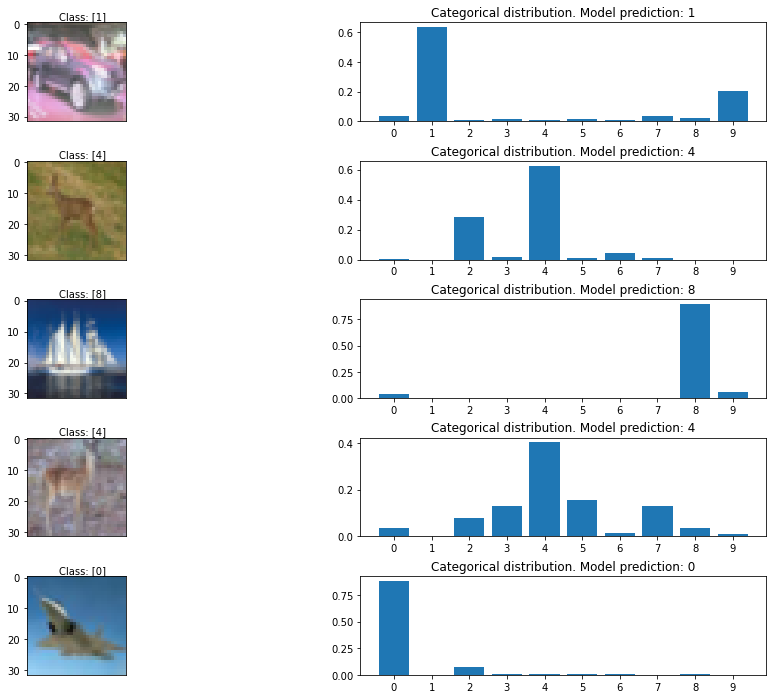

In [43]:
import numpy as np

num_test_images = y_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model1.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for i, (prediction, images, labels) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(images))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Class: {labels}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()